In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Vietnamese_ASR/data

/content/drive/MyDrive/Vietnamese_ASR/data


# Download data

## ASR

In [ ]:
# !gdown --fuzzy https://drive.google.com/file/d/1vUSxdORDxk-ePUt-bUVDahpoXiqKchMx/view -O data.rar

In [ ]:
# !ls -lh data.rar

In [ ]:
# !tar -xf data.rar

In [ ]:
# !rm data.rar

## LM

In [ ]:
# !wget https://github.com/duyvuleo/VNTC/blob/master/Data/27Topics/Ver1.1/Test.rar?raw=true -O data_LM.rar

In [ ]:
# !unrar x data_LM.rar 

# Explore data

In [ ]:
import glob
import os

all_audio_file_paths = glob.glob("data/vlsp2020_train_set_02/*.wav")
all_script_file_paths = glob.glob("data/vlsp2020_train_set_02/*.txt")

In [ ]:
print(len(all_script_file_paths))
print(len(all_audio_file_paths))
# assert len(all_audio_file_paths) == len(all_scipt_file_paths)

12875
12659


In [ ]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import random 

In [ ]:
def get_text(path_to_script_file):
    with open(path_to_script_file,'r') as f:
        text = f.readlines()[0]
    return text

In [ ]:
sample = all_script_file_paths[150]
audio_sample = sample.replace(".txt",".wav")
assert audio_sample in all_audio_file_paths, "No file exist! Sed"
print(get_text(sample))
ipd.Audio(sample.replace(".txt",".wav"))

gắn luôn cho anh chị xem nhé vì sáng mai khách hàng họ lấy rồi tôi lên đơn luôn và gắn luôn


In [ ]:
signal, sr = librosa.load(audio_sample)

Sample with sample rate: 22050
118850


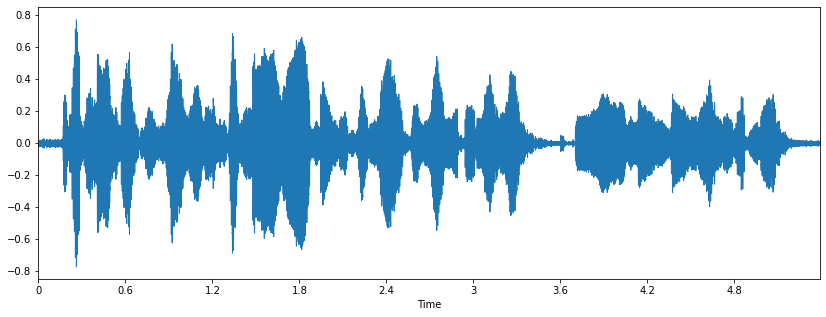

In [ ]:
plt.figure(figsize=(14, 5))
print(f"Sample with sample rate: {sr}")
print(len(signal))
librosa.display.waveplot(signal, sr)

In [ ]:
from tqdm import tqdm
'''
total_duration = 0.0
max_duration = 0.0
for audio_path in tqdm(all_audio_file_paths):
    duration = librosa.get_duration(filename=audio_path)
    if duration > max_duration:
        max_duration = duration
    total_duration+=duration
'''

In [ ]:
'''
print(f"Total duration: {total_duration}")
print(f"Max duration: {max_duration}")
'''

# Prepare data

Need to be more serious!


In [ ]:
import glob 
import os

## ASR

In [ ]:
'''
import json
from tqdm import tqdm 

RATIO = 0.8
train_paths = all_audio_file_paths[:int(RATIO*len(all_audio_file_paths))]
val_paths = all_audio_file_paths[int(RATIO*len(all_audio_file_paths)):int((1+RATIO)/2*len(all_audio_file_paths))]
test_paths = all_audio_file_paths[int((1+RATIO)/2*len(all_audio_file_paths)):]

In [ ]:
def make(paths, save_json_path):
    all_data = {}
    for path in tqdm(train_paths):
        name = path.split("/")[-1][:-4]
        try:
            text = get_text(path.replace(".wav",".txt"))
        except:
            continue
        duration = librosa.get_duration(filename=path)
        all_data[name] = {
            "wav": path,
            "length": duration,
            "words": text.upper()
        }
    with open(save_json_path, 'w') as f:
        json.dump(all_data, f, indent=4, ensure_ascii=False)

In [ ]:
# make(test_paths, "test.json")

In [ ]:
# make(val_paths, "valid.json")

In [ ]:
# make(train_paths, "train.json")

## LM

In [ ]:
def modify_names(root="/content/drive/MyDrive/Vietnamese_ASR/data/new_test"):
    catagories = os.listdir(root)
    for i,cata in enumerate(catagories):
        os.rename(os.path.join(root, cata),os.path.join(root, str(i)))
        txt_files = glob.glob(os.path.join(root,"*/*.txt"))
        for j,txt_file in enumerate(txt_files):
            name = txt_file.split("/")[-1].split(".")[0]
            os.rename(txt_file,txt_file.replace(name,str(j)))

In [ ]:
# modify_names()

In [ ]:
import glob
import os 
from tqdm.notebook import tqdm

def create_manifest_files(root="/content/drive/MyDrive/Vietnamese_ASR/data/new_test", ratio=0.8):
    txt_files = glob.glob(os.path.join(root,"*/*.txt"))
    train_txt = ''
    valid_txt = ''
    test_txt = ''
    for i,file in tqdm(enumerate(txt_files)):
        with open(file, 'rb') as f:
            try:
                text = f.read().decode("utf16").strip().upper()
                if i < len(txt_files)*ratio:
                    train_txt+=text
                elif len(txt_files)*ratio < i < len(txt_files)*(1+ratio)/2:
                    valid_txt+=text
                else:
                    test_txt+=text
            except:
                print(file)
                print("ERROR!!!!")
                break
    with open("/content/drive/MyDrive/Vietnamese_ASR/speechbrain/templates/speech_recognition/LM/data/train.txt","w") as f:
        f.write(train_txt)
    with open("/content/drive/MyDrive/Vietnamese_ASR/speechbrain/templates/speech_recognition/LM/data/valid.txt","w") as f:
        f.write(valid_txt)
    with open("/content/drive/MyDrive/Vietnamese_ASR/speechbrain/templates/speech_recognition/LM/data/test.txt","w") as f:
        f.write(test_txt)


In [ ]:
# create_manifest_files()

12075it [28:06,  7.16it/s]
